In [1]:
import pandas as pd

dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alura/Custering_Extraindo_dados/CC GENERAL.csv")
dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True) # inplace=True é para alterar o dataframe original 
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [2]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [4]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [5]:
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [6]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.36443927743081506


Índice Davies Bouldin

In [7]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0758787031571042


Índice Calinski-Harabasz

In [8]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.782548172111


In [9]:
def clustering_algorithm(n_clusters, dataset):
    Kmeans = KMeans(n_clusters=n_clusters,  n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [10]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.36454314826693845 1.075812734747931 3431.800540734652


In [11]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36457606314711744 1.0749530537541765 3431.5800207486104


In [12]:
s3, dbs3, calinski3 = clustering_algorithm(20, values)
print(s3, dbs3, calinski3)

0.36465640969844565 1.074708321128269 3431.5669187059098


Validação dos dados 

In [13]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)


0.03932391680532864 3.4985941062947696 303.14905893596324
0.36457606314711744 1.0749530537541765 3431.5800207486104


In [14]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36913033620249025 1.0550646728831619 1203.9822438867243
0.3539831746159207 1.1396268152633489 1194.938464178726
0.36704188760608253 1.0984932613776763 1167.5309516804


<function matplotlib.pyplot.show(close=None, block=None)>

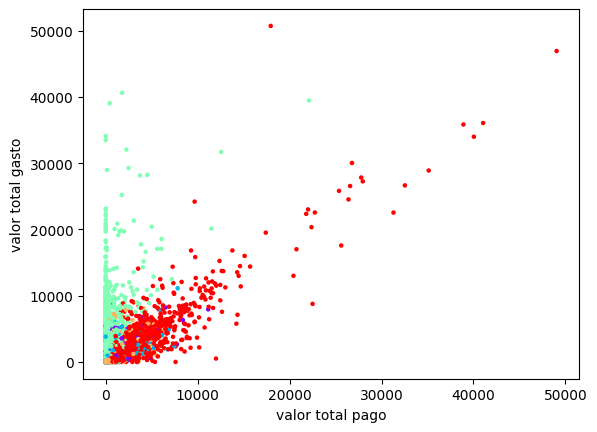

In [15]:
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow' )
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

In [16]:
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

Output hidden; open in https://colab.research.google.com to view.

In [17]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0         412.0  1987.146873  1852.215743  70.794108  1020.146724   
1        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
2        1072.0  1794.024195  1982.950586   0.000000   506.925348   
3        3276.0   444.212219   846.809334   0.000000    23.287145   
4        1541.0  1140.395363  1663.836536   0.000000   209.490297   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1338.918346  2133.415063  11670.179850             412.0  0.989512   
1        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
2        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
3          82.992153   411.833075   9630.367575            3276.0  0.774280   
4         552.464447  1369.969909  19043.138560            1541.0  0.928099   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      7086.774783  76406.207520            412.0  0.019271   
1        ...      1330.593643   8345.641905           2649.0  0.001799   
2        ...       884.718306  21235.065300           1072.0  0.117384   
3        ...       248.900782   4483.503862           3276.0  0.246293   
4        ...       523.422296  18621.013310           1541.0  0.279266   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.090795  0.0  0.0  0.000000  0.000000  1.0  
1        0.023260  0.0  0.0  0.000000  0.000000  0.6  
2        0.186853  0.0  0.0  0.083333  0.142857  1.0  
3        0.346454  0.0  0.0  0.000000  0.444444  1.0  
4        0.367477  0.0  0.0  0.083333  0.545455  1.0  

[5 rows x 128 columns]

In [18]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.16345982e-01 2.73885268e-04 6.16786571e-02 3.52655645e-02
  2.64130926e-02 4.17152570e-01 6.01784007e-05 2.34262322e-05
  3.85700606e-05 8.95510967e-05 2.13098314e-03 1.16519638e-03
  5.06063472e-01 6.14845827e-01 1.06841272e-01 4.31646071e-05]
 [5.68220623e-02 3.18971238e-04 1.31632725e-01 3.41951402e-02
  9.76255382e-02 1.62618461e-02 2.58099550e-04 2.58822159e-05
  2.24193531e-04 9.37046743e-06 1.33814091e-04 3.73126081e-03
  9.39423194e-01 1.60385645e-01 7.40488227e-02 1.16157211e-04]
 [1.58332307e-01 3.25849518e-04 4.51856233e-01 2.36488689e-01
  2.15833973e-01 2.91514646e-02 2.71983160e-04 1.02335868e-04
  2.03233837e-04 1.55073823e-05 2.83346225e-04 7.10026980e-03
  5.78509579e-01 4.02113419e-01 9.82977076e-02 1.03084561e-04]
 [3.36597049e-01 3.20738797e-04 1.51047445e-01 3.35330503e-02
  1.18336738e-01 6.78897645e-02 1.92498455e-04 2.42745677e-05
  1.72905514e-04 2.26302604e-05 5.14730694e-04 4.02824961e-03
  3.88939673e-01 2.30691615e-01 6.84981201e-01 3.39289298e-06]
 [4.

vericando a variância 


In [19]:
max = len(centroids[0])
for i in range(max):
  print(dataframe.columns.values[i],"\n{:.4f}".format(centroids [:, i].var()))

BALANCE 
0.0204
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0212
ONEOFF_PURCHASES 
0.0066
INSTALLMENTS_PURCHASES 
0.0049
CASH_ADVANCE 
0.0280
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0356
PAYMENTS 
0.0300
MINIMUM_PAYMENTS 
0.0534
PRC_FULL_PAYMENT 
0.0000


## intepretando os clusters

BALANCE 0.0205

PURCHASES 0.0210

CASH_ADVANCE 0.0280

CREDIT_LIMIT 0.0356

PAYMENTS 0.0301

In [20]:
dataframe.groupby("cluster")["BALANCE"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,412.0,1987.146873,1852.215743,70.794108,1020.146724,1338.918346,2133.415063,11670.179850
1,2649.0,3037.962543,2478.838161,6.824905,1256.612223,2174.018945,4223.867789,18495.558550
2,1072.0,1794.024195,1982.950586,0.000000,506.925348,1087.920500,2308.762488,14581.459140
3,3276.0,444.212219,846.809334,0.000000,23.287145,82.992153,411.833075,9630.367575
4,1541.0,1140.395363,1663.836536,0.000000,209.490297,552.464447,1369.969909,19043.138560


In [21]:
description = dataframe.groupby("cluster")["BALANCE","PURCHASES","CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS"]
print(description.mean())

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS
cluster                                                                   
0        1987.146873   858.326286    420.107194   2226.699029  1338.974045
1        3037.962543   385.248630   1636.917210   4495.771989   968.890376
2        1794.024195   475.494823   3270.246792   3976.372399  4709.556601
3         444.212219   629.173858    141.655729   5134.705973   814.396458
4        1140.395363  3266.466710    182.900631   4096.794388  3034.900772


<ipython-input-21-ca72b00f1b8b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE","PURCHASES","CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS"]


In [22]:
description = dataframe.groupby("cluster")["BALANCE","PURCHASES","CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
1        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
2        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   
3         444.212219   629.173858    141.655729   5134.705973   814.396458   
4        1140.395363  3266.466710    182.900631   4096.794388  3034.900772   

         n_clients  
cluster             
0              412  
1             2649  
2             1072  
3             3276  
4             1541  


<ipython-input-22-646510cd4147>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE","PURCHASES","CASH_ADVANCE","CREDIT_LIMIT","PAYMENTS"]


## análise manual dos valores obtidos
### Balance 
2: clientes com os maiores valores em gastos

1: clientes com os menores valores em gastos
### Punchases (compras):
3: clientes com maiores valores em compras

2: clientes com menores valores em compras 
### CASH_ADVANCE (saques)
4: clientes com maiores valores em saques

1: clientes com menores valores em saques 
### CREDIT_LIMIT (limite de cartão):
1: (...) maiores valores de limite 

0: (...) menores valores de limite
### PAYMENTS (pagamentos):
4: (...) maiores valores pagos 

1: (...) menores valores pagos 
### Clients
1: maior número de clientes 

0: menor número de clientes 




In [23]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
1,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
2,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
3,3276.0,0.246293,0.346454,0.0,0.0,0.000000,0.444444,1.0
4,1541.0,0.279266,0.367477,0.0,0.0,0.083333,0.545455,1.0
